In [49]:
# Import dependencies
import timeit
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
# Import Data
main_file_path = '../data/data_customer.csv'
data = pd.read_csv(main_file_path)

print(data.shape)
data.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Preprocessing

In [51]:
# Display all column headers
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [52]:
# Display Data types of each column
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [53]:
# Variable TotalCharges should be a continuous numeric data type rather than a discrete object data type
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

# Check for NULL entries
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [54]:
# Remove all entries that contain NULL
data.dropna(inplace=True)

# Remove customer ID
df = data.iloc[:,1:]

# Upsample
#https://chrisalbon.com/machine_learning/preprocessing_structured_data/handling_imbalanced_classes_with_upsampling/
# Indicies of each class' observations
i_class0 = np.where(df.Churn == 'Yes')[0]
i_class1 = np.where(df.Churn == 'No')[0]

# Number of observations in each class
n0 = len(i_class0)
n1 = len(i_class1)

# For every observation in class 1, randomly sample from class 0 with replacement
i_class0_upsampled = np.random.choice(i_class0, size=n1, replace=True)

# Join together class 0's upsampled target vector with class 1's target vector
i_upsampled = np.concatenate((i_class0_upsampled, i_class1))
df_upsampled = df.iloc[i_upsampled.tolist(),:]

# Separate X and Y
ydata = df_upsampled.Churn
xdata_raw = df_upsampled.drop(['Churn'], axis=1)

# Convert Chrun into binary numeric variable
ydata.replace(to_replace='Yes', value=1, inplace=True)
ydata.replace(to_replace='No', value=0, inplace=True)

# Convert all categorial variables in xdata into dummy variables
xdata = pd.get_dummies(xdata_raw)



/home/shawnzy/.virtualenvs/machine_learning/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [55]:
# Scale all features from 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = xdata.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(xdata)
xdata = pd.DataFrame(scaler.transform(xdata))
xdata.columns = features

xdata.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.042254,0.660199,0.039384,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.042254,0.670647,0.034947,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.070423,0.649751,0.052937,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.000000,0.531343,0.006099,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.000000,0.506965,0.005816,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Predictive Models

In [56]:
# Split data into test and training sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 


#### - Decision Tree
Learning curve: # Train samples
Complexity curve: Max_depth

In [57]:
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import roc_curve, auc

def decision_tree(X_train, X_test, y_train, y_test, max_depth):
    dtree = DecisionTreeClassifier(max_depth=5)  
    
    start_time = timeit.default_timer()
    dtree.fit(X_train, y_train) 
    fit_time = timeit.default_timer() - start_time
    
    start_time1 = timeit.default_timer()
    y_pred = dtree.predict(X_test)
    pred_time = timeit.default_timer() - start_time1
    
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, fit_time, pred_time

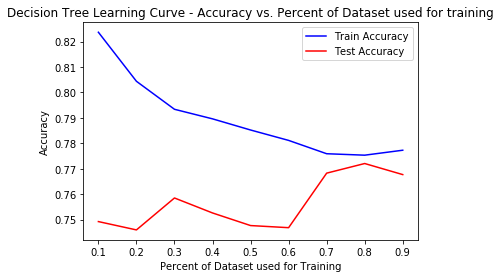

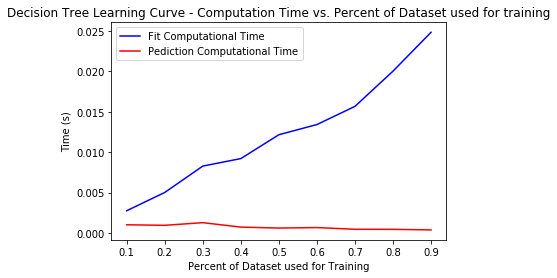

In [58]:
# Learning curve based off of number of Samples in training set
test_percentages = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
train_percentages = [.9,.8,.7,.6,.5,.4,.3,.2,.1]
train_results = []
test_results = []
fit_time_results = []
pred_time_results = []
for percent in test_percentages:
    X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=percent, random_state=101)
    test_accuracy, test_fit_time, test_pred_time = decision_tree(X_train, X_test, y_train, y_test, max_depth=5)
    test_results.append(test_accuracy)
    fit_time_results.append(test_fit_time)
    pred_time_results.append(test_pred_time)
    
    train_accuracy, train_fit_time, train_pred_time = decision_tree(X_train, X_train, y_train, y_train, max_depth=5)
    train_results.append(train_accuracy)

plt.figure(0)
line1, = plt.plot(train_percentages, train_results, 'b')
line2, = plt.plot(train_percentages, test_results, 'r')
plt.ylabel('Accuracy')
plt.xlabel('Percent of Dataset used for Training')
plt.title('Decision Tree Learning Curve - Accuracy vs. Percent of Dataset used for training')
plt.legend(["Train Accuracy","Test Accuracy"])
plt.show()

plt.figure()
plt.plot(train_percentages, fit_time_results, 'b')
plt.plot(train_percentages, pred_time_results, 'r')
plt.ylabel('Time (s)')
plt.xlabel('Percent of Dataset used for Training')
plt.title('Decision Tree Learning Curve - Computation Time vs. Percent of Dataset used for training')
plt.legend(["Fit Computational Time", "Pediction Computational Time"])
plt.show()

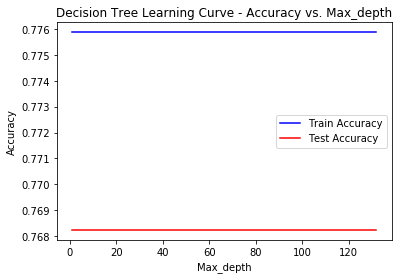

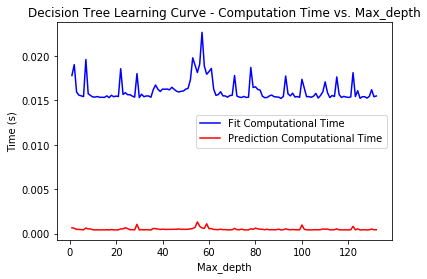

In [59]:
# Learning curve based off of number of Samples in training set
depths = np.linspace(1, 132, 132, endpoint=True)
train_results = []
test_results = []
fit_time_results = []
pred_time_results = []
X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=.3, random_state=101)

for depth in depths:
    test_accuracy, test_fit_time, test_pred_time = decision_tree(X_train, X_test, y_train, y_test, max_depth=depth)
    test_results.append(test_accuracy)
    fit_time_results.append(test_fit_time)
    pred_time_results.append(test_pred_time)
    
    train_accuracy, train_fit_time, train_pred_time = decision_tree(X_train, X_train, y_train, y_train, max_depth=depth)
    train_results.append(train_accuracy)

plt.figure(0)
plt.plot(depths, train_results, 'b')
plt.plot(depths, test_results, 'r')
plt.ylabel('Accuracy')
plt.xlabel('Max_depth')
plt.title('Decision Tree Learning Curve - Accuracy vs. Max_depth')
plt.legend(["Train Accuracy", "Test Accuracy"])
plt.show()

plt.figure(1)
plt.plot(depths, fit_time_results, 'b', label="Fit Computational Time")
plt.plot(depths, pred_time_results, 'r', label="Prediction Computational Time")
plt.ylabel('Time (s)')
plt.xlabel('Max_depth')
plt.title('Decision Tree Learning Curve - Computation Time vs. Max_depth')
plt.legend(["Fit Computational Time", "Prediction Computational Time"])
plt.show()

In [ ]:
def decision_tree_auc(X_train, X_test, y_train, y_test, max_depth):
    dtree = DecisionTreeClassifier(max_depth=5)  
    dtree.fit(X_train, y_train) 
    y_pred = dtree.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    return roc_auc

In [ ]:
# Learning curve based off of number of Samples in training set
percentages = [.9,.8,.7,.6,.5,.4,.3,.2,.1]
train_results = []
test_results = []
time_results = []
for percent in percentages:
    X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=percent, random_state=101)
    start_time = timeit.default_timer()
    test_acc = decision_tree_auc(X_train, X_test, y_train, y_test, max_depth=5)
    time_results.append(timeit.default_timer() - start_time)
    test_results.append(test_acc)
    train_results.append(decision_tree_auc(X_train, X_train, y_train, y_train, max_depth=5))

plt.figure(0)
line1, = plt.plot(precentages, train_results, 'b', label="Train Accuracy")
line2, = plt.plot(precentages, test_results, 'r', label="Test Accuracy")
plt.ylabel('Area under the curve')
plt.xlabel('Percent of Dataset used for Training')
plt.title('Decision Tree Learning Curve - Area under the curve vs. Percent of Dataset used for training')
plt.show()

plt.figure()
plt.plot(precentages, time_results, 'b', label="Train Accuracy")
plt.ylabel('Time (s)')
plt.xlabel('Percent of Dataset used for Training')
plt.title('Decision Tree Learning Curve - Computation Time vs. Percent of Dataset used for training')
plt.show()

In [ ]:
# Learning curve based off of number of Samples in training set
depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
train_auc_results = []
test_auc_results = []
X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=.3, random_state=101)
for depth in depths:
    start_time = timeit.default_timer()
    test_acc = decision_tree(X_train, X_test, y_train, y_test, max_depth=depth)
    elapsed = timeit.default_timer() - start_time
    print('This "{name}" took {time} seconds to complete.'.format(name='decision tree', time=elapsed))
    test_results.append(test_acc)
    test_auc_results.append(decision_tree_auc(X_train, X_test, y_train, y_test, max_depth=depth))
    
    train_results.append(decision_tree(X_train, X_train, y_train, y_train, max_depth=depth))
    train_auc_results.append(decision_tree_auc(X_train, X_train, y_train, y_train, max_depth=depth))

line1, = plt.plot(depths, train_auc_results, 'b', label="Train Accuracy")
line2, = plt.plot(depths, test_auc_results, 'r', label="Test Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Max_depth')
plt.show()

#### - Neural Network

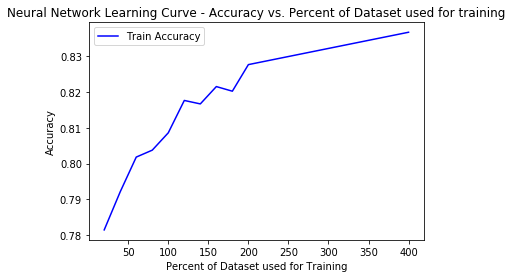

In [64]:
from sklearn.neural_network import MLPClassifier
hidden_layer_sizes = [20,40,60,80,100,120,140,160,180,200,400]
X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=.3, random_state=101)
results = []
for hidden_layer_size in hidden_layer_sizes:
    NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(hidden_layer_size,), random_state=1)
    NN.fit(X_train, y_train)

    y_pred = NN.predict(X_test)
    results.append(accuracy_score(y_test, y_pred))
    
plt.figure(0)
plt.plot(hidden_layer_sizes, results, 'b')
plt.ylabel('Accuracy')
plt.xlabel('Number of Hidden Layers')
plt.title('Neural Network Learning Curve - Accuracy vs. Number of Hidden Layers')
plt.legend(["Train Accuracy","Test Accuracy"])
plt.show()

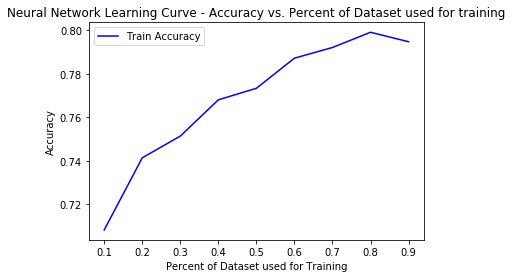

In [65]:
test_percentages = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
train_percentages = [.9,.8,.7,.6,.5,.4,.3,.2,.1]
results = []
for percent in test_percentages:
    X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=percent, random_state=101)

    NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(40,), random_state=1)
    NN.fit(X_train, y_train)

    y_pred = NN.predict(X_test)
    results.append(accuracy_score(y_test, y_pred))
    
plt.figure(0)
plt.plot(train_percentages, results, 'b')
plt.ylabel('Accuracy')
plt.xlabel('Percent of Dataset used for Training')
plt.title('Neural Network Learning Curve - Accuracy vs. Percent of Dataset used for training')
plt.legend(["Train Accuracy","Test Accuracy"])
plt.show()

In [61]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print('Overall Accuracy = ', accuracy_score(y_test, y_pred))

[[1141  418]
 [ 294 1245]]
             precision    recall  f1-score   support

          0       0.80      0.73      0.76      1559
          1       0.75      0.81      0.78      1539

avg / total       0.77      0.77      0.77      3098

Overall Accuracy =  0.7701743060038735


#### - Boosting

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, max_depth = 5, random_state = 0)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

In [69]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print('Overall Accuracy = ', accuracy_score(y_test, y_pred))

[[1403  143]
 [ 280  287]]
             precision    recall  f1-score   support

          0       0.83      0.91      0.87      1546
          1       0.67      0.51      0.58       567

avg / total       0.79      0.80      0.79      2113

Overall Accuracy =  0.7998106956933271


#### - Support Vector Machine

In [64]:
from sklearn.svm import SVC
svm = SVC(kernel='linear') 
svm.fit(X_train,y_train)

preds = svm.predict(X_test)

In [65]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print('Overall Accuracy = ', accuracy_score(y_test, y_pred))

[[1317  229]
 [ 293  274]]
             precision    recall  f1-score   support

          0       0.82      0.85      0.83      1546
          1       0.54      0.48      0.51       567

avg / total       0.74      0.75      0.75      2113

Overall Accuracy =  0.7529578797917653


#### -  K-NN

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [62]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print('Overall Accuracy = ', accuracy_score(y_test, y_pred))

[[1317  229]
 [ 293  274]]
             precision    recall  f1-score   support

          0       0.82      0.85      0.83      1546
          1       0.54      0.48      0.51       567

avg / total       0.74      0.75      0.75      2113

Overall Accuracy =  0.7529578797917653
